# Dictionaries

In this lesson we will get to know and become experts in:

1. [Dictionaries](#Dictionaries)
    * DataCamp, [Intermediate Python](https://campus.datacamp.com/courses/intermediate-python), Chap 2
2. [Titanic](#Titanic)
    * Introduction to sampling and testing 
    


### Dictionaries

 A [dictionary](https://wesmckinney.com/book/python-builtin.html#dict) is basically a **lookup table**. It stores a collection of key-value pairs, where key and value are Python objects. Each key is associated with a value so that a value can be conveniently retrieved, inserted, modified, or deleted given a particular key.

 The dictionary or `dict` may be the most important built-in Python data structure. In other programming languages, dictionaries are sometimes called *hash maps* or *associative arrays*. 




In [1]:
#Analogy to a language dictionary:
EnglishGerman = {"slander": "Verleumdung",
                 "salient" : ["auffallend", "hervorstechend"],
                 "secular" : "profan",
                 "rejoice" : "jubeln"}

In [2]:
europe = {'spain':'madrid', 'france' : 'paris'}
print(europe["spain"])
print("france" in europe)
print("paris" in europe)#only checks the keys!
europe["germany"] = "berlin"
print(europe.keys())
print(europe.values())

madrid
True
False
dict_keys(['spain', 'france', 'germany'])
dict_values(['madrid', 'paris', 'berlin'])


### Dictionaries from lists

How would we convert two lists into a key: value pair dictionary?

Method 1: using `zip`


In [3]:
rooms=['hallway', 'kitchen', 'living room', 'bedroom', 'bathroom']
areas=[11.25, 18.0, 20.0, 10.75, 9.5]
#create list of tuples
list(zip(rooms, areas))

[('hallway', 11.25),
 ('kitchen', 18.0),
 ('living room', 20.0),
 ('bedroom', 10.75),
 ('bathroom', 9.5)]

In [4]:
house = dict(zip(rooms, areas))
house

{'hallway': 11.25,
 'kitchen': 18.0,
 'living room': 20.0,
 'bedroom': 10.75,
 'bathroom': 9.5}

You can directly convert a dictionary to a one-column DataFrame where the keys become the row index and the values become the column entries.

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(house, orient='index', columns=['value'])
print(df)

             value
hallway      11.25
kitchen      18.00
living room  20.00
bedroom      10.75
bathroom      9.50


If you need to iterate over both the keys and values, you can use the `items` method to iterate over the keys and values as 2-tuples:

In [6]:
#print(list(europe.items()))

for country, capital in europe.items():
    print(capital, "is the capital of", country)

madrid is the capital of spain
paris is the capital of france
berlin is the capital of germany


**Note**: You can use integers as keys as well. However -unlike in lists- one should not think of them as positional indices! 

In [7]:
#Assume you have a basement:
house[0] = 21.5
house

{'hallway': 11.25,
 'kitchen': 18.0,
 'living room': 20.0,
 'bedroom': 10.75,
 'bathroom': 9.5,
 0: 21.5}

In [8]:
#And there is a difference between the string and the integer index!
house["0"] = 30.5
house

{'hallway': 11.25,
 'kitchen': 18.0,
 'living room': 20.0,
 'bedroom': 10.75,
 'bathroom': 9.5,
 0: 21.5,
 '0': 30.5}

Categorize a list of words by their first letters as a dictionary of lists:

In [9]:
words = ["apple", "bat", "bar", "atom", "book"]

by_letter = {}

for word in words:
     letter = word[0]
     if letter not in by_letter:
        by_letter[letter] = [word]
     else:
         by_letter[letter].append(word)


#### Tasks


1. Write a function named `word_count()` that takes a string as input and returns a dictionary with each word in the string as a key and the number of times it appears as the value, e.g.  `word_count("I really really really like this really nice book")` should yield: `{"I":1, "book":1 , "like":1, "really": 4, "this":1}`
2. Convert the dict into a pd dataframe and -using Boolean subsetting- only keep rows with counts > 1!


# Titanic

In [10]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# get age coloumn
titanic['age']

# row subsetting - row1-2
#titanic[row,column]
#titanic[0:2,0]

#in numpy
titanic.iloc[0:2,0]

#get me rows 13 to 24 (ends inclusive) -> actual indicies 12-23
#titanic.iloc[12:24,:]

# subsetting rows using .loc
titanic.loc[0:1,'age']

#get me rows 27 to 48 (ends inclusive)
titanic.iloc[26:48,:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False


What are the estimated survival probabilities by sex and class separately?

In [12]:
bySexnClass = titanic.groupby(['sex', 'pclass']).survived
bySexnClass.agg(['mean','count']) 

mean  count
sex    pclass                 
female 1       0.968085     94
       2       0.921053     76
       3       0.500000    144
male   1       0.368852    122
       2       0.157407    108
       3       0.135447    347

In [13]:
byClass = titanic.groupby("pclass").survived
byClass.mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

What are the estimated survival probabilities by class and sex simultaneously ?

Can we also get counts ?

There seem to be clear differences in probabilties/proportions.

1. How can we be sure that they are not due to small sample sizes ?
2. Can we put an uncertainty on the estimates ?



In [14]:
def toss_biased_coin(pHead, n, seed=None):
  """
    Simulates n tosses of a biased coin and returns the proportion of heads,
    using rng.choice() for better conceptual clarity.

    Parameters
    ----------
    p : float
        Probability of heads (between 0 and 1).
    n : int
        Number of tosses.
    seed : int, optional
        Random seed for reproducibility.

    Returns
    -------
    float
        Proportion of heads observed.
    """
  rng = np.random.default_rng(seed)

  tosses = rng.choice([0,1], size=n, p=[1-pHead,pHead])
  cts = np.sum(tosses == 1)
  cts = np.sum(tosses)
  prop_heads = cts/n

  prop_heads = np.mean(tosses)

  return prop_heads


In [21]:
import numpy as np
#let us run this many times !
pHead_obs = np.zeros(500)

for i in range(500):
  pHead_obs[i] = toss_biased_coin(pHead=0.157407, n= 108)

pHead_obs

array([0.15740741, 0.12037037, 0.15740741, 0.16666667, 0.10185185,
       0.25925926, 0.12037037, 0.19444444, 0.15740741, 0.15740741,
       0.13888889, 0.10185185, 0.12962963, 0.2037037 , 0.19444444,
       0.16666667, 0.15740741, 0.18518519, 0.10185185, 0.15740741,
       0.15740741, 0.15740741, 0.11111111, 0.11111111, 0.17592593,
       0.21296296, 0.10185185, 0.14814815, 0.17592593, 0.08333333,
       0.23148148, 0.12962963, 0.2037037 , 0.15740741, 0.21296296,
       0.12037037, 0.12962963, 0.10185185, 0.15740741, 0.18518519,
       0.13888889, 0.11111111, 0.16666667, 0.14814815, 0.10185185,
       0.12962963, 0.17592593, 0.14814815, 0.21296296, 0.13888889,
       0.17592593, 0.12962963, 0.15740741, 0.13888889, 0.16666667,
       0.13888889, 0.13888889, 0.19444444, 0.12962963, 0.11111111,
       0.17592593, 0.18518519, 0.2037037 , 0.16666667, 0.21296296,
       0.18518519, 0.11111111, 0.15740741, 0.15740741, 0.13888889,
       0.15740741, 0.16666667, 0.17592593, 0.12962963, 0.19444

In [22]:
#95% interval:
np.percentile(pHead_obs, [2.5,97.5])


array([0.08773148, 0.22708333])

(array([  2.,   4.,  31.,  59., 111., 119., 101.,  51.,  19.,   3.]),
 array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ]),
 <BarContainer object of 10 artists>)

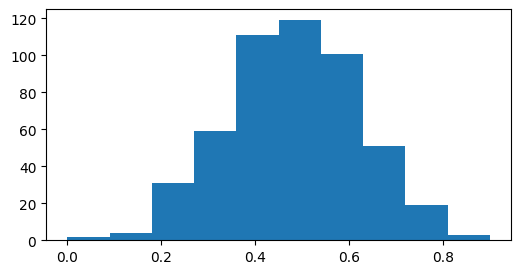

In [28]:
#histogram 
import matplotlib.pyplot as plt

plt.figure(figsize=[6,3])
plt.hist(pHead_obs)


Write a function which simulates tossing a "biased coin" (with $p=0.157407$) $108$ times and computes the proportion of "heads".

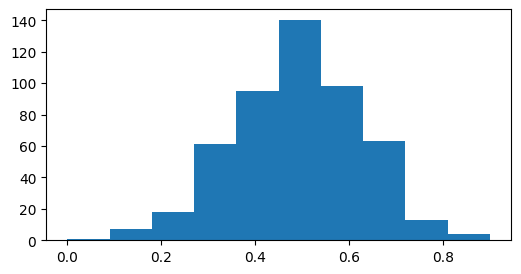

In [44]:
pHead_obs = np.zeros(500)

for i in range(500):
  pHead_obs[i] = toss_biased_coin(pHead=0.5, n= 10)

plt.figure(figsize=[6,3]);
plt.hist(pHead_obs);

In [41]:
#how likely is that one sees sth. "as extreme as 7/3"?
np.mean(pHead_obs >= 0.7) + np.mean(pHead_obs <= 0.3)

np.float64(0.33399999999999996)

In [45]:
s = np.std(pHead_obs)
0.5 + 2*s
0.5 + 2*s

np.float64(0.15282342752340036)

In [ ]:
SUPER IMPORTANT!!!!

The Famous sqrt(n) law
how do go from p -> sigma 

In [ ]:
p=0.
#Variance
p*(1-p)
np.sqrt(p*(1-p))
